In [27]:
import pandas as pd
import joypy
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('data/raw_dataset.csv')
data.shape

(4424, 35)

### Univariate Analysis
**Course:**
We will convert the numbers to names according to the key symbol:

In [3]:
course_names = pd.read_csv("categories/tA4_course_names.csv")
course_dict = dict(zip(course_names["ID"], course_names["Course_Name"]))
data['Course'] = data['Course'].replace(course_dict)

In [4]:
data['Course'].value_counts()

Course
Nursing                                 766
Management                              380
Social Service                          355
Veterinary Nursing                      337
Journalism and Communication            331
Advertising and Marketing Management    268
Management (evening attendance)         268
Tourism                                 252
Communication Design                    226
Animation and Multimedia Design         215
Social Service (evening attendance)     215
Agronomy                                210
Basic Education                         192
Informatics Engineering                 170
Equiniculture                           141
Oral Hygiene                             86
Biofuel Production Technologies          12
Name: count, dtype: int64

In [5]:
data['Course'].value_counts(normalize=True).round(3)

Course
Nursing                                 0.173
Management                              0.086
Social Service                          0.080
Veterinary Nursing                      0.076
Journalism and Communication            0.075
Advertising and Marketing Management    0.061
Management (evening attendance)         0.061
Tourism                                 0.057
Communication Design                    0.051
Animation and Multimedia Design         0.049
Social Service (evening attendance)     0.049
Agronomy                                0.047
Basic Education                         0.043
Informatics Engineering                 0.038
Equiniculture                           0.032
Oral Hygiene                            0.019
Biofuel Production Technologies         0.003
Name: proportion, dtype: float64

The next table shows the distribution of students across courses, broken down by their final academic outcome

In [6]:
table = data.groupby(['Course','Target']).size().unstack(fill_value=0)
table

Target,Dropout,Enrolled,Graduate
Course,,,
Advertising and Marketing Management,95,48,125
Agronomy,86,37,87
Animation and Multimedia Design,82,37,96
Basic Education,85,50,57
Biofuel Production Technologies,8,3,1
Communication Design,51,42,133
Equiniculture,78,21,42
Informatics Engineering,92,64,14
Journalism and Communication,101,34,196







**Nationality:**
We will convert the numbers to names according to the key symbol:

In [7]:
Nacionality_names = pd.read_csv("categories/tA2_nationality.csv")
Nacionality_dict = dict(zip(Nacionality_names["ID"], Nacionality_names["Nationality"]))
data['Nacionality'] = data['Nacionality'].replace(Nacionality_dict)

In [8]:
data['Nacionality'].value_counts()

Nacionality
Portuguese               4314
Brazilian                  38
Santomean                  14
Cape Verdean               13
Spanish                    13
Guinean                     5
Moldova (Republic of)       3
Italian                     3
Ukrainian                   3
Angolan                     2
Mexican                     2
Romanian                    2
Mozambican                  2
German                      2
Russian                     2
Turkish                     1
Dutch                       1
Colombian                   1
Cuban                       1
English                     1
Lithuanian                  1
Name: count, dtype: int64

We can see that the data is unbalanced. We will think what to do with it. <br>
Also, for Sanity test we can check whether the students who are not from Portugal are really international students, etc.<br>
<br>
**Marital status:** We will convert the numbers to names according to the key symbol:


In [9]:
Marital_Status_names = pd.read_csv("categories/tA1_marital_status.csv")
Marital_Status_dict = dict(zip(Marital_Status_names["ID"], Marital_Status_names["Marital_Status"]))
data['Marital status'] = data['Marital status'].replace(Marital_Status_dict)

In [10]:
data['Marital status'].value_counts()

Marital status
Single                 3919
Married                 379
Divorced                 91
Common-law marriage      25
Legally separated         6
Widower                   4
Name: count, dtype: int64

Unbalanced but totally reasonable. I wouldn't expect anything else either. <br>
<br>
We will move to application mode. a reminder: Application mode indicates the admission route through which a student entered the university.
Each number represents a different type of admission process (e.g., regular admission, transfer, special pathway international student entry, etc.).


In [11]:
Application_Mode_names = pd.read_csv("categories/tA3_application_mode.csv")
Application_Mode_dict = dict(zip(Application_Mode_names["ID"], Application_Mode_names["App_Mode"]))
data['Application mode'] = data['Application mode'].replace(Application_Mode_dict)

In [12]:
data['Application mode'].value_counts()

Application mode
1st phase—general contingent                           1708
2nd phase—general contingent                            872
Over 23 years old                                       785
Change in course                                        312
Technological specialization diploma holders            213
Holders of other higher courses                         139
3rd phase—general contingent                            124
Transfer                                                 77
Change in institution/course                             59
1st phase—special contingent (Madeira Island)            38
Short cycle diploma holders                              35
International student (bachelor)                         30
1st phase—special contingent (Azores Island)             16
Ordinance No. 854-B/99                                   10
Ordinance No. 612/93                                      3
Change in institution/course (International)              1
Ordinance No. 533-A/99,

In [13]:
table = data.groupby(['Application mode','Target']).size().unstack(fill_value=0)
table

Target,Dropout,Enrolled,Graduate
Application mode,,,
1st phase—general contingent,345,300,1063
1st phase—special contingent (Azores Island),2,8,6
1st phase—special contingent (Madeira Island),5,8,25
2nd phase—general contingent,256,159,457
3rd phase—general contingent,45,16,63
Change in course,115,75,122
Change in institution/course,20,13,26
Change in institution/course (International),0,0,1
Holders of other higher courses,85,7,47


Now let's move on to analyzing the average grades in semester A. This is a quantitative variable. I filter the data by those who did not receive a 0, because that means there is no data on them.

In [14]:
filtered = data[data['Curricular units 1st sem (grade)'] != 0]

sem1_filtered = filtered ['Curricular units 1st sem (grade)']

sem1_filtered.describe()

count    3706.000000
mean       12.702373
std         1.346842
min         9.800000
25%        11.750000
50%        12.626786
75%        13.571429
max        18.875000
Name: Curricular units 1st sem (grade), dtype: float64

In [15]:
sem1 = data['Curricular units 1st sem (grade)']
sem1.describe()

count    4424.000000
mean       10.640822
std         4.843663
min         0.000000
25%        11.000000
50%        12.285714
75%        13.400000
max        18.875000
Name: Curricular units 1st sem (grade), dtype: float64

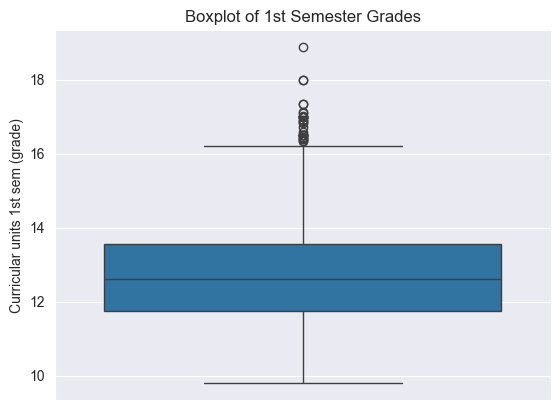

In [16]:
sns.boxplot(data=filtered, y='Curricular units 1st sem (grade)')
plt.title("Boxplot of 1st Semester Grades")
plt.show()

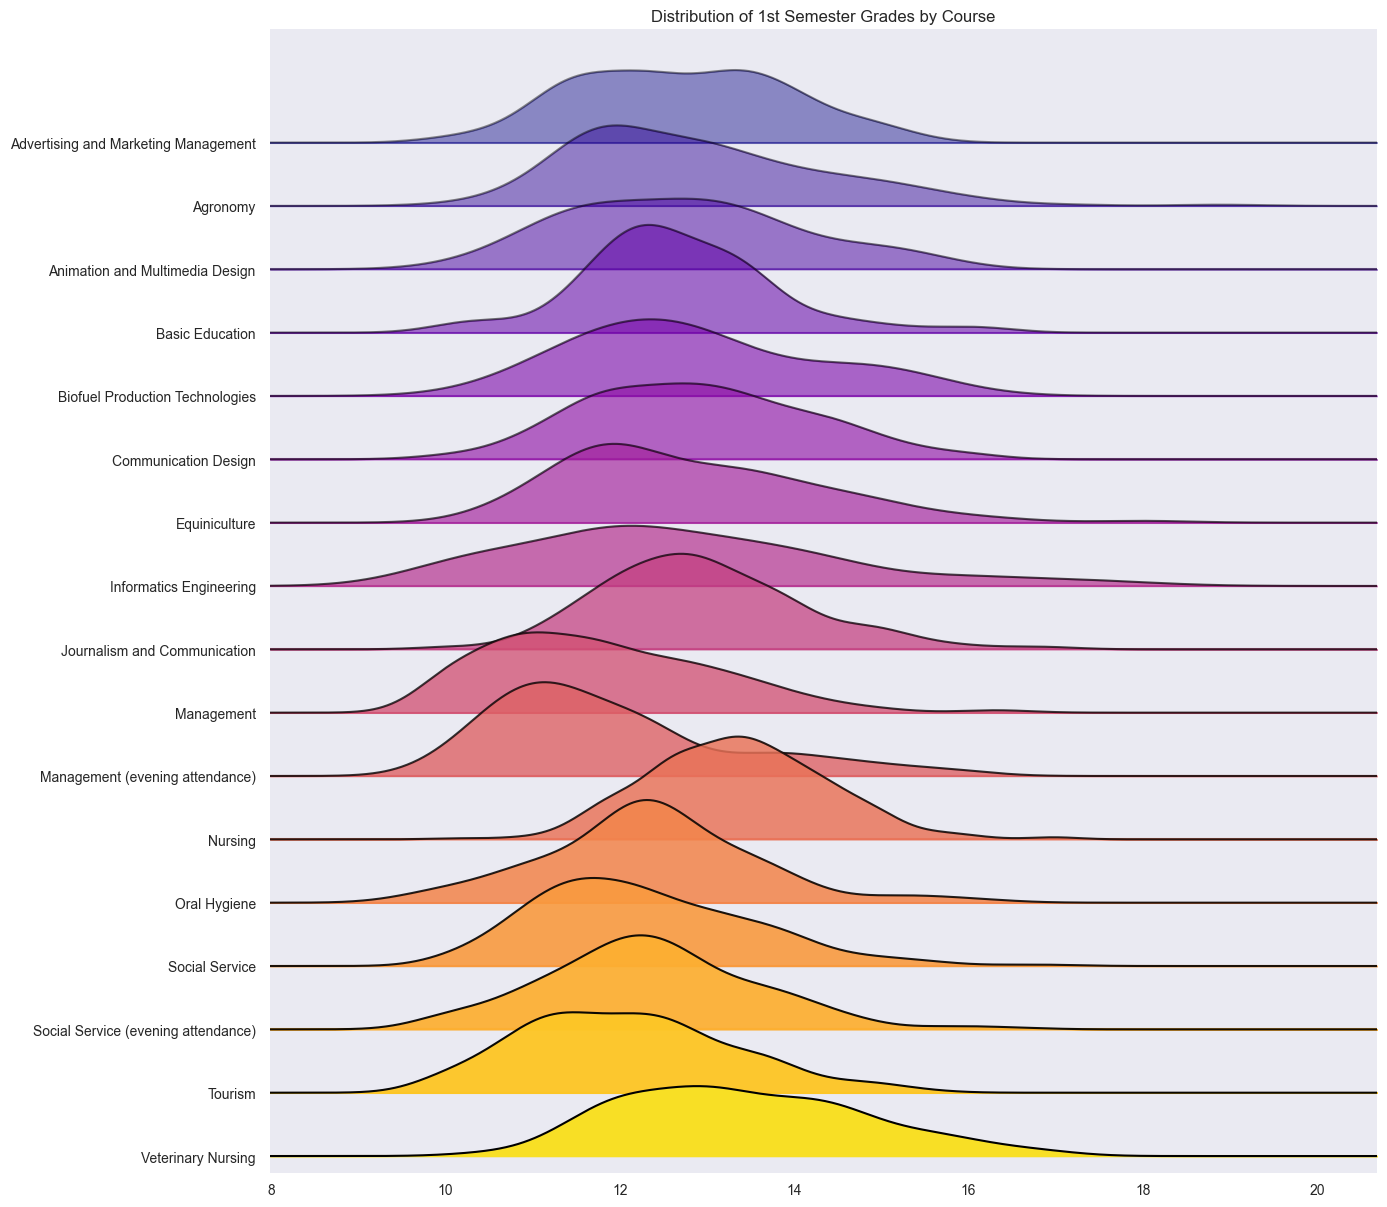

In [20]:

joypy.joyplot(
    filtered,
    by="Course",   # שורה לכל קורס
    column="Curricular units 1st sem (grade)",  # מדד ההתפלגות
    figsize=(14, 12),
    colormap=plt.cm.plasma,   # הצבעים היפים בתמונה שלך
    fade=True
)

plt.title("Distribution of 1st Semester Grades by Course")
plt.show()

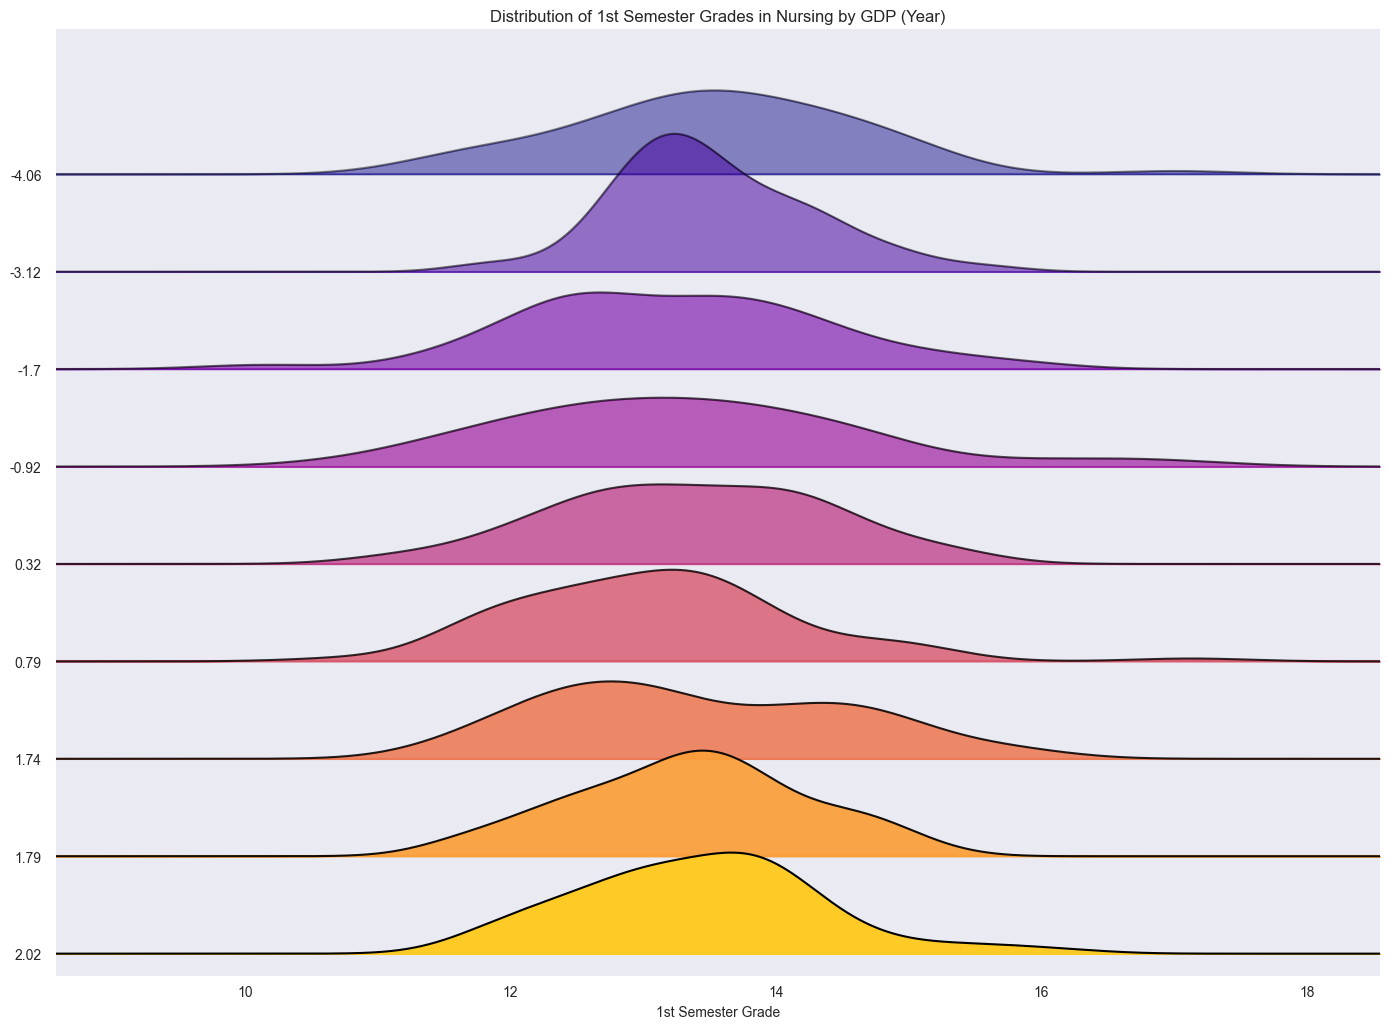

In [18]:
joypy.joyplot(
    data[(data['Curricular units 1st sem (grade)']!=0) & (data['Course']=='Nursing')],
    by="GDP",   # כל שורה = ערך GDP (שנה)
    column="Curricular units 1st sem (grade)",  # ההתפלגות שנצייר
    figsize=(14, 10),
    colormap=plt.cm.plasma,
    fade=True
)

plt.title("Distribution of 1st Semester Grades in Nursing by GDP (Year)")
plt.xlabel("1st Semester Grade")
plt.show()

In [19]:
data[data['Course'] == 'Nursing'].groupby('GDP').size()

GDP
-4.06     66
-3.12     90
-1.70    106
-0.92     68
 0.32     99
 0.79     84
 1.74     90
 1.79     82
 2.02     81
dtype: int64

In [21]:
quantitative = [
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]
df_quant = data[quantitative].copy()

In [24]:
sem_cols = [
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)"
]
df_clean = df_quant[ ~(df_quant[sem_cols] == 0).all(axis=1) ].copy()

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean.drop(columns=["Target"], errors="ignore"))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
})

# אם אתה רוצה לצבוע לפי טרגט
pca_df["Target"] = data.loc[df_clean.index, "Target"]

fig = px.scatter(
    pca_df,
    x="PC1",
    y="PC2",
    color="Target",
    title="PCA Projection (PC1 vs PC2)",
    opacity=0.7
)

fig.show()

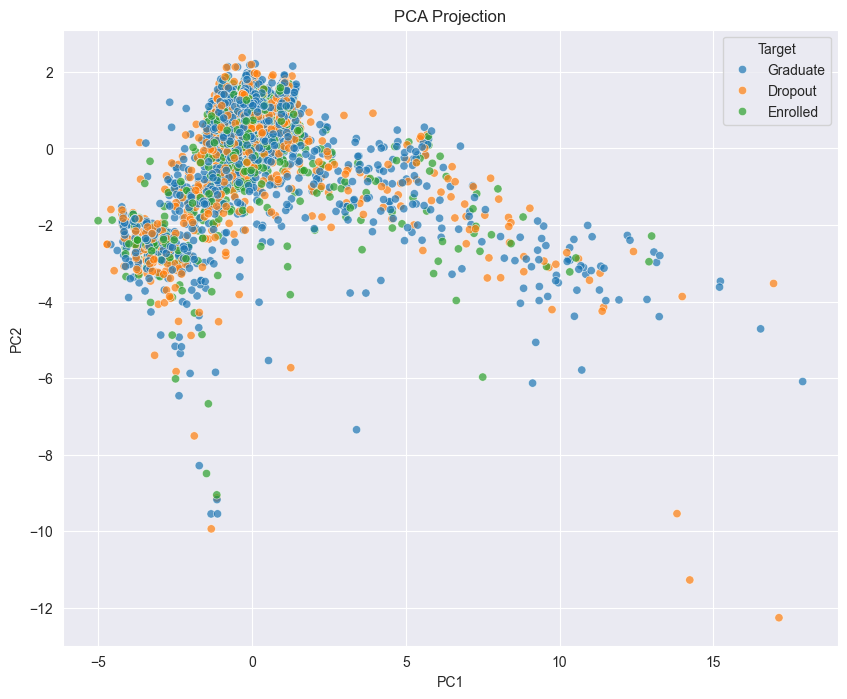

In [32]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Target", alpha=0.7)
plt.title("PCA Projection")
plt.show()

In [33]:
pca.explained_variance_ratio_

array([0.3669135 , 0.15104485])

In [34]:
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

# 3. בניית DataFrame לתצוגה
pca3_df = pd.DataFrame({
    "PC1": X_pca3[:, 0],
    "PC2": X_pca3[:, 1],
    "PC3": X_pca3[:, 2],
})

# הוספת Target לצביעה
pca3_df["Target"] = data.loc[df_clean.index, "Target"]

# 4. גרף תלת־מימדי עם Plotly
fig = px.scatter_3d(
    pca3_df,
    x="PC1",
    y="PC2",
    z="PC3",
    color="Target",
    opacity=0.7,
    title="3D PCA Projection (PC1, PC2, PC3)"
)

fig.show()

# אופציונלי: לבדוק כמה שונות כל קומפוננטה מסבירה
pca3.explained_variance_ratio_

array([0.3669135 , 0.15104485, 0.09739929])